# SOLVING CLASSIFICATION PROBLEM

# USING ENSEMBLES AND SAVING A TRAINED MODEL FOR DEPLOYMENT

# Using Adult Income Dataset

The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc..

There are two class values in the dataset namely:  ‘>50K‘ and ‘<=50K‘, meaning it is a binary classification task. The classes are imbalanced, with a skew toward the ‘<=50K‘ class label.

‘>50K’: majority class, approximately 25%.
‘<=50K’: minority class, approximately 75%.

# PART 1

In [197]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 10)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [198]:
Adult_data = pd.read_csv("adult.csv")

Adult_data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [199]:
Adult_data.shape

(48842, 15)

We will also specify two lists, one which contains the categorical columns, and one which contains the numeric columns of interest. The categorical columns of interest are: "workclass", "education", "marital-status", "occupation","relationship", "race", "gender", "native-country". The numeric columns are: "age", "education-num", "capital-gain", "capital-loss", "hours-per-week". We will exclude fnlwgt as it is not a particularly useful variable 

In [200]:
CATEGORICAL_COLUMNS = ["workclass", "education", "marital-status", "occupation",
                       "relationship", "race", "gender", "native-country"]  # I did not use any categorical variable because i skipped the data encoding stage. You should do it.
CONTINUOUS_COLUMNS = ["age", "educational-num", "capital-gain", "capital-loss",
                      "hours-per-week"]

In [201]:
#Designate the input features as X
X= Adult_data[CONTINUOUS_COLUMNS]

In [202]:
X.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,18,10,0,0,30


In [203]:
#Designate the outcome or target variable as y
y = Adult_data.income
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

# Sampling (train, test(1st) and "validation" (validation here is another test data that will later arise from the cross_val process)

In [204]:
# "validation data (the second test data) helps in tunning the model at the training stage 
# Without necccessary touching the "original test data".

First, let us divide the Adult dataset into train/validation/test partitions. 
Partition of 20% will be use as the test data to evaluate our model at the final end (this stands for unseen real world data).
We will not use the test data until the final stage of testing the model. 
The remainder will be subdivided into train and validation data.
We can use the validation data to test any intermediary decision on the go at the time of training our model with train data.

A validation dataset is a sample of data held back from training your model that is used to give an estimate of model skill while tuning model’s hyperparameters.

The validation dataset is different from the test dataset that is also held back from the training of the model, but is instead used to give an unbiased estimate of the skill of the final tuned model when comparing or selecting between final models.

Random_state is a seed for the way the data is split- if you use the same seed in the future, you will be guaranteed the exact same data will be in each of the training and validation sets as before. In order words, Using a random_state, we can seed the random numbers generator to make its behavior replicable.

The validation set essentially allows us to check how “overfitted” or “underfitted” our model is.

It allow us to both tune the model complexity to the sweet spot and provides a much better estimate of how the model will perform with unseen data since the model does not use the validation data to train on.

Note that it is entirely normal (even probable) that the validation accuracy will be lower than the training accuracy. In fact, if they were very similar, it’d be a great indicator that your model might not be complex enough (underfitted).

That said the training accuracy doesn’t matter.

The only thing that matters is getting the best possible validation accuracy, since this is actually somewhat reflective of how the model will perform in the wild.

# The Trade-offs

More training data is nice because it means your model sees more examples and thus hopefully finds a better solution. If you have a tiny training data set your model won’t be able to learn general principles and will have bad validation / test set performance (in other words, it won’t work.)

More validation data is nice because it helps you make a better decision about which model is “The Best.” If you don’t have enough validation data, then there will be a lot of noise in your estimate of which model is “The Best” and you might not make a good choice.

More test data is nice because it gives you a better sense of how well your model generalizes to unseen data. If you don’t have enough test data, your final assessment of the model’s generalization ability might not be accurate.

###  Splitting into TRAIN and TEST DATA. (We will do a second test data later as the "validation data" during the cross validation process)

In [205]:
#Without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [206]:
X_train.shape #Training data features

(39073, 5)

In [207]:
y_train.shape # Training data target

(39073,)

### Go Hide this

In [208]:
X_test.shape # Is the original test data features. Don't touch this until the very last stage

(9769, 5)

In [209]:
y_test.shape # Is the original test data target. Don't touch this until the very last stage

(9769,)

## Automatic Outlier Detection

In [210]:
## Use DBSCAN 

In [211]:
#import the implementation of this algorihm from sklearn
from sklearn.cluster import DBSCAN

#Use the algorithm for outlier detection, the retun in clusters will show the membership of each point
#Any point labelled as -1 is an outlier

outlier_detection = DBSCAN(min_samples = 3, eps = 3)
clusters = outlier_detection.fit_predict(X_train)

#Count total number of outliers as count of those labelled as -1
TotalOutliers=list(clusters).count(-1)
print("Total number of outliers identified is: ",TotalOutliers)

Total number of outliers identified is:  2685


In [212]:
# select all rows that are not outliers and update the X_train and y_train.
mask = clusters != -1
X1_train, y1_train = X_train[mask], y_train[mask]

In [213]:
# summarize the shape of the updated training dataset
print(X1_train.shape, y1_train.shape)

(36388, 5) (36388,)


In [214]:
ground_truth = clusters
print ("Ground truth: \n", ground_truth)

Ground truth: 
 [ 0  0  0 ...  0  0 64]


In [ ]:
## Use also Isolation Forest

In [215]:
#import the implementation of this algorihm from sklearn
from sklearn.ensemble import IsolationForest

#Use the algorithm for outlier detection, then use it to predict each point
#Any point labelled as -1 is an outlier
clf = IsolationForest(max_samples=150, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(X_train)
print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

#Calculate number of erroneos predictions where outlier predicction does not coindice with groundtruth
newarray= ((preds == -1) & (ground_truth==0))

n_errors= len([i for i in newarray if i==True])
print("Number of incorrectly identified outliers: ",n_errors)

[-1  1  1 ...  1  1 -1]
Total number of outliers identified is:  6186
Number of incorrectly identified outliers:  1998


In [216]:
# select all rows that are not outliers and update the X_train and y_train.
mask = preds != -1
X2_train, y2_train = X_train[mask], y_train[mask] # Hence forth we will continue with X2_train, y2_train.

In [217]:
# summarize the shape of the updated training dataset
print(X2_train.shape, y2_train.shape)

(32887, 5) (32887,)


### So we would go with the isolation forest

# Balancing of the Data

In [218]:
y2_train.value_counts()

<=50K    26347
>50K      6540
Name: income, dtype: int64

In [219]:
#Concatenate y2_train and X2_train to apply balancing, we would seperate them later again.
df = pd.concat([y2_train, X2_train], axis=1)

In [220]:
df.head(10)

,income,age,educational-num,capital-gain,capital-loss,hours-per-week
24794,<=50K,29,9,0,0,38
32958,<=50K,29,10,0,0,52
30752,>50K,38,9,0,0,50
21744,<=50K,53,6,0,0,40
46682,>50K,37,14,0,0,45
36795,<=50K,25,10,0,0,40
46247,<=50K,22,10,0,0,50
22962,<=50K,34,9,0,0,40
40033,>50K,36,14,0,0,40
38950,<=50K,36,9,0,0,40


# Apply Up Sampling Technique

In [221]:
from sklearn.utils import resample

# Separate majority and minority classes. 

df_majority = df[df.income!=">50K"]
df_minority = df[df.income==">50K"]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=26347,     # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Show dataset statistics
print(df_upsampled.describe())
 
# Display new class counts
df_upsampled.income.value_counts()


                age  educational-num  capital-gain  capital-loss  \
count  52694.000000     52694.000000  52694.000000  52694.000000   
mean      39.575341        10.610032    196.178313      0.573595   
std       11.871765         2.312055   1022.087979     21.486956   
min       17.000000         2.000000      0.000000      0.000000   
25%       31.000000         9.000000      0.000000      0.000000   
50%       39.000000        10.000000      0.000000      0.000000   
75%       48.000000        13.000000      0.000000      0.000000   
max       90.000000        16.000000   7688.000000   1138.000000   

       hours-per-week  
count    52694.000000  
mean        41.854936  
std          9.924587  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         84.000000  


>50K     26347
<=50K    26347
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

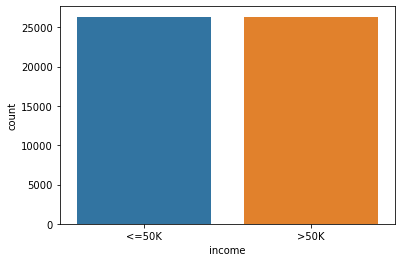

In [222]:
#Show distribution of the class on whole dataset
sns.countplot(x= 'income', data=df_upsampled)

In [223]:
#Now check the NEW upsampled dataframe
df_upsampled.head()

,income,age,educational-num,capital-gain,capital-loss,hours-per-week
24794,<=50K,29,9,0,0,38
32958,<=50K,29,10,0,0,52
21744,<=50K,53,6,0,0,40
36795,<=50K,25,10,0,0,40
46247,<=50K,22,10,0,0,50


In [224]:
#mapping the income column into numerical data using map function
df_upsampled['income'] = df_upsampled['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [225]:
df_upsampled.head(10)

,income,age,educational-num,capital-gain,capital-loss,hours-per-week
24794,0,29,9,0,0,38
32958,0,29,10,0,0,52
21744,0,53,6,0,0,40
36795,0,25,10,0,0,40
46247,0,22,10,0,0,50
22962,0,34,9,0,0,40
38950,0,36,9,0,0,40
31826,0,53,9,0,0,30
46079,0,32,13,0,0,50
45837,0,29,9,0,0,40


In [226]:
df_upsampled.tail(10)

,income,age,educational-num,capital-gain,capital-loss,hours-per-week
4463,1,59,9,0,0,40
46871,1,40,12,0,0,40
19945,1,62,13,0,0,60
13274,1,38,14,0,0,60
18786,1,57,9,0,0,55
10737,1,40,13,0,0,40
14653,1,31,13,0,0,40
3884,1,31,9,0,0,40
34592,1,48,10,0,0,40
32980,1,50,13,0,0,45


we can see that now our income attribute has numerical data. Pandas .map() function has replaced every ‘<=50K’ with 0 value and ‘>50K’ with 1 and .astype(int) is to mention that replaced value should be of type int.

In [227]:
df_upsampled.shape

(52694, 6)

In [228]:
df_upsampled.dtypes #Confirm to have the right data type for all colunmns.

income             int32
age                int64
educational-num    int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
dtype: object

# Check for Missing Data

In [229]:
# get the number of missing data points per column
missing_values_count = df_upsampled.isnull().sum()
missing_values_count

income             0
age                0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64

In [230]:
#Save the cleaned training dataset in csv format
df_upsampled.to_csv('Adult_traindata.csv', index=False)

# PART 2

In [231]:
#Designate the input features as X
features=["age", "educational-num", "capital-gain", "capital-loss",
                      "hours-per-week"]
X= df_upsampled[features]
X.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
24794,29,9,0,0,38
32958,29,10,0,0,52
21744,53,6,0,0,40
36795,25,10,0,0,40
46247,22,10,0,0,50


In [232]:
#Designate the outcome or target variable as y
y = df_upsampled.income
y.head()

24794    0
32958    0
21744    0
36795    0
46247    0
Name: income, dtype: int32

# Split the training dataframe into new train and test data(X_test1, validation data)

In [233]:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1)

In [234]:
X_train.shape

(42155, 5)

In [235]:
X_test1.shape

(10539, 5)

In [236]:
y_test1.shape

(10539,)

# TRAINING A SINGLE MODEL 

# Fit a Simple Logistic Regression Algorithm

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [238]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [239]:
y_pred = model.predict(X_test1)

In [240]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [241]:
print("Test_score : ", accuracy_score(y_test1, y_pred)) # compare accuracy of the actual with the predicted

Test_score :  0.7092703292532498


In [242]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test1, y_pred))

Confusion Matrix
[[3758 1571]
 [1493 3717]]


In [243]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test1, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      5329
           1       0.70      0.71      0.71      5210

    accuracy                           0.71     10539
   macro avg       0.71      0.71      0.71     10539
weighted avg       0.71      0.71      0.71     10539



# Cross Validation with a Suite of other MACHINE LEARNING ALGORITHMS

In [244]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [245]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

# Using Cross Validation Approach for Training

In [246]:
# evaluate a given model using cross-validation (Use whole X_train and y_train). Since it does the partioning by itself.

In [247]:
#The evaluate_model() function below takes a model instance and returns a list of scores from three repeats of stratified 10-fold cross-validation.

def evaluate_model(model,X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.715 (0.006)
>knn 0.740 (0.006)
>cart 0.771 (0.005)
>svm 0.696 (0.007)
>bayes 0.722 (0.007)


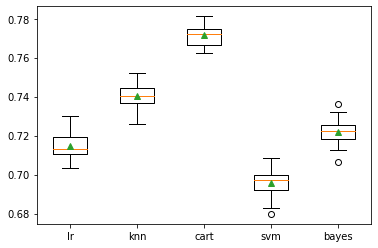

In [248]:
# get the models to evaluate
models = get_models() # Retrieve all the models for us and store them in "models"
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train) # use the cross validation function
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

We can see that in this case, cart (DecisionTreeClassifier) performs the best with about 77.1 percent mean accuracy.

## Apply Ensemble Modelling

In [ ]:
from sklearn.ensemble import StackingClassifier

Next, we can try to combine these five models into a single ensemble model using stacking.
We can use a logistic regression model to learn how to best combine the predictions from each of the separate five models.

In [ ]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    
    # define the stacking ensemble (all of them now called "model")
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

In [ ]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train) #Ensembles are here now as "model"
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
#pyplot.boxplot(results, labels=names, showmeans=True)
#pyplot.show()

In this case, we can see that the stacking ensemble appears to perform better than any single model on average, with about 77 percent mean accuracy.

## make a prediction for one example

In [ ]:
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

In [ ]:
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [ ]:
# fit the model on all available data
model.fit(X_train, y_train)

In [ ]:
# make a prediction for one example
data = [[53,9,0,2,45]] # Features(age,educational-num,capital-gain,capital-loss,hours-per-week) in our training data
yhat = model.predict(data) # The model here is the ensemble.
print('Predicted Class: %d' % (yhat))

Running the example fits the stacking ensemble model on the entire dataset and is then used to make a prediction on a new row of data, as we might when using the model in an application. The Predicted class here is 1.

## Save the Model using Pickle

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = 'classifierfinalized_model.sav' #This is a trained and tested ensemble model.
pickle.dump(model, open(filename, 'wb'))

## Score the Pickled Model on OUR FIRST Test Data (Real World data in this case)

In [ ]:
# Remember the first test data (X_test and y_test)

In [ ]:
# some time later...............
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test) # New incoming data
print(result)